In [1]:
import pandas as pd

In [2]:
masks_df = pd.read_csv('marks.csv')
masks_df

,study_time,Marks
0,600,90
1,550,88
2,500,85
3,450,77
4,400,71
5,350,67


In [15]:
y = masks_df[['Marks']]
y

,Marks
0,90
1,88
2,85
3,77
4,71
5,67


In [13]:
x = masks_df[['study_time']]
x

,study_time
0,600
1,550
2,500
3,450
4,400
5,350


In [10]:
x.shape

(6, 1)

#### Goal is to predict the value of Y given a value for X in LinearRegressions

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
print("Slope (Coefficient):", model.coef_)
print("Intercept:", model.intercept_)

Slope (Coefficient): [[0.09942857]]
Intercept: [32.43809524]


In [22]:
r2 = model.score(x, y)
print("R^2 Score:", r2)

R^2 Score: 0.9668724717905045


In [23]:
y_pred = model.predict(x)
y_pred

array([[92.0952381 ],
       [87.12380952],
       [82.15238095],
       [77.18095238],
       [72.20952381],
       [67.23809524]])

In [24]:
import matplotlib.pyplot as plt

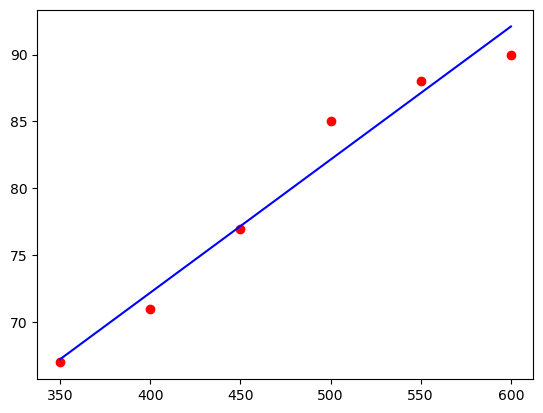

In [25]:
plt.scatter(x, y, c = "red")
plt.plot(x,y_pred, c = "blue")

In [26]:
students_df = pd.read_csv('Student_Performance.csv')
students_df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [27]:
y = students_df['Performance Index']
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [29]:
x = students_df.drop(columns= ['Performance Index'])
x['Extracurricular Activities'] = x['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [32]:
X_train.shape, y_train.shape

((8000, 5), (8000,))

In [33]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
y_pred = model.predict(X_test)
y_pred

array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301], shape=(2000,))

In [35]:
y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
6412    45.0
8285    66.0
7853    16.0
1095    65.0
6929    47.0
Name: Performance Index, Length: 2000, dtype: float64

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [40]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [41]:
print("The mse is:", mse)
print("The rmse is:", rmse)
print("The r2_score is:", r2*100)

The mse is: 4.082628398521855
The rmse is: 2.020551508505006
The r2_score is: 98.89832909573146


In [44]:
model.intercept_

np.float64(-33.92194621555635)

In [42]:
model.coef_

array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144])

In [43]:
X_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9254,5,49,0,7,5
1561,2,48,1,7,6
1670,2,81,0,7,2
6087,2,46,0,6,1
6669,8,47,0,9,0
...,...,...,...,...,...
5734,8,50,1,6,6
5191,4,68,0,9,3
5390,9,48,0,7,6
860,1,47,0,9,0


In [57]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [56]:
ridge = Ridge()

In [54]:
parameters = {'alpha': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [58]:
grid_ridge_model = GridSearchCV(ridge, parameters, scoring= 'r2')

In [59]:
grid_ridge_model.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,12


In [60]:
y_pred = grid_ridge_model.predict(X_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [62]:
print("The mse is:", mse)
print("The rmse is:", rmse)
print("The r2_score is:", r2*100)

The mse is: 4.082751298253447
The rmse is: 2.0205819206984525
The r2_score is: 98.89829593203268
